In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os


In [4]:


torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'




In [5]:
def train_network(neural_net, inputs, targets):
    max_epochs = 1200
    epochs_tracker, losses = [], []
    has_converged = False
    current_epoch = 0
    gradient_magnitudes = []

    while not has_converged:
        current_epoch += 1
        output = neural_net(inputs)
        loss_value = loss_fn(output, targets)
        optimizer.zero_grad()  # Clear the gradients
        loss_value.backward()  # Backpropagate the loss
        optimizer.step()  # Update the weights

        epochs_tracker.append(current_epoch)
        losses.append(loss_value.detach().numpy())

        total_gradient = 0.0
        for parameter in neural_net.parameters():
            grad = 0.0
            if parameter.grad is not None:
                grad = (parameter.grad.cpu().data.numpy() ** 2).sum()
            total_gradient += grad
        gradient_norm = total_gradient ** 0.5
        gradient_magnitudes.append(gradient_norm)

        if current_epoch % 100 == 0:
            print(f'Epoch {current_epoch}: Loss = {loss_value.item():.4f}')

        if current_epoch == max_epochs:
            print("Reached maximum epochs")
            has_converged = True

        elif (current_epoch > 5) and (losses[-1] < 0.001):
            if abs(losses[-3] - losses[-2]) < 1.0e-5 and abs(losses[-2] - losses[-1]) < 1.0e-5:
                print(f"Converged at epoch {current_epoch} with loss: {losses[-1]:.6f}")
                has_converged = True

    return epochs_tracker, losses, output, gradient_magnitudes

In [6]:
x_values = np.expand_dims(np.arange(-1.5, 1.5, 0.01), axis=1)
print(x_values.shape)
y_values = np.sinc(5 * x_values)
print(y_values.shape)

(300, 1)
(300, 1)


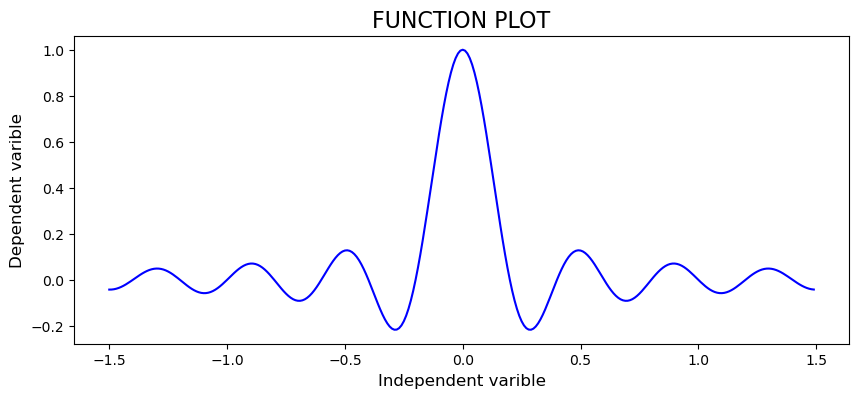

In [8]:
x_tensor, y_tensor = torch.tensor(x_values, dtype=torch.float32), torch.tensor(y_values, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x_tensor, y_tensor, color = "blue")
plt.title('FUNCTION PLOT', fontsize=16)
plt.xlabel('Independent varible', fontsize=12)
plt.ylabel('Dependent varible', fontsize=12)
plt.show()

In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer1 = nn.Linear(1, 5)
        self.hidden_layer2 = nn.Linear(5, 10)
        self.hidden_layer3 = nn.Linear(10, 10)
        self.hidden_layer4 = nn.Linear(10, 10)
        self.hidden_layer5 = nn.Linear(10, 10)
        self.hidden_layer6 = nn.Linear(10, 10)
        self.hidden_layer7 = nn.Linear(10, 5)
        self.output_layer = nn.Linear(5, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.hidden_layer1(x))
        x = nn.functional.leaky_relu(self.hidden_layer2(x))
        x = nn.functional.leaky_relu(self.hidden_layer3(x))
        x = nn.functional.leaky_relu(self.hidden_layer4(x))
        x = nn.functional.leaky_relu(self.hidden_layer5(x))
        x = nn.functional.leaky_relu(self.hidden_layer6(x))
        x = nn.functional.leaky_relu(self.hidden_layer7(x))
        return self.output_layer(x)

# Initialize model, optimizer, and loss function
network = NeuralNetwork()

In [14]:
optimizer = torch.optim.Adam(network.parameters(), lr=1e-3, weight_decay=1e-4)
loss_fn = torch.nn.MSELoss()

# Print the number of model parameters
total_parameters = sum(p.numel() for p in network.parameters())
print(f"Total model parameters: {total_parameters}")

# Train the model
epochs, loss_vals, predicted, gradients = train_network(network, x_tensor, y_tensor)

Total model parameters: 571
Epoch 100: Loss = 0.0774
Epoch 200: Loss = 0.0607
Epoch 300: Loss = 0.0524
Epoch 400: Loss = 0.0387
Epoch 500: Loss = 0.0048
Epoch 600: Loss = 0.0031
Epoch 700: Loss = 0.0023
Epoch 800: Loss = 0.0023
Epoch 900: Loss = 0.0022
Epoch 1000: Loss = 0.0022
Epoch 1100: Loss = 0.0022
Epoch 1200: Loss = 0.0022
Reached maximum epochs


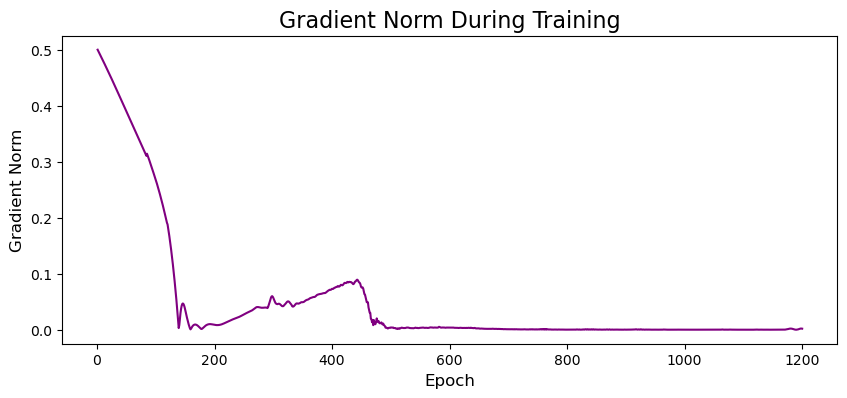

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(epochs, gradients, color="purple")
plt.title('Gradient Norm During Training', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Gradient Norm', fontsize=12)
plt.show()

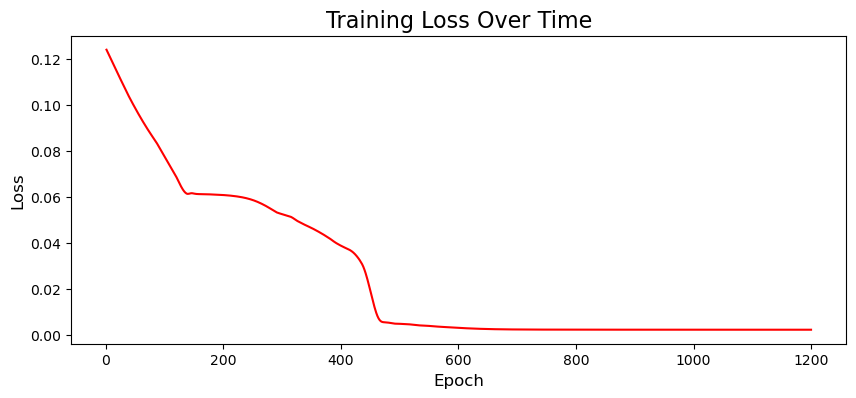

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(epochs, loss_vals, color="red")
plt.title('Training Loss Over Time', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()

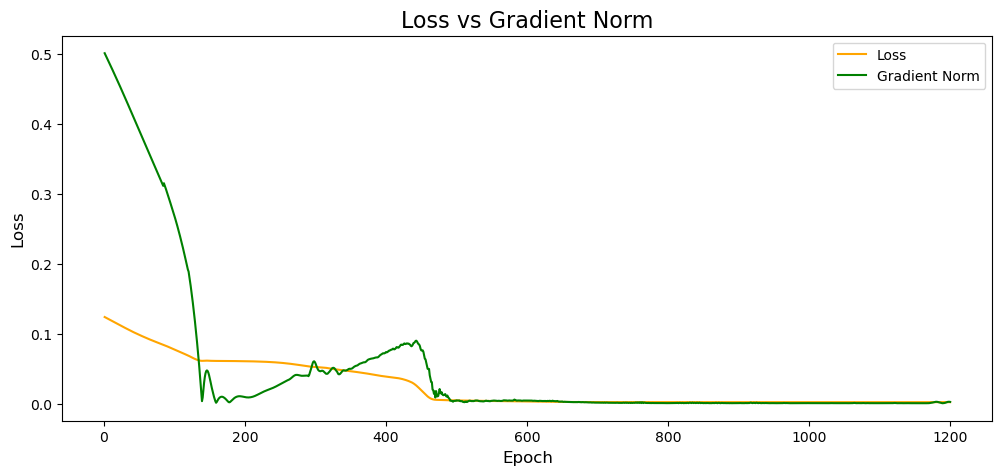

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss_vals, label='Loss', color="orange")
plt.plot(epochs, gradients, label='Gradient Norm', color="green")
plt.title('Loss vs Gradient Norm', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()